#  Welcome to this project
#  This project is all about classifying dog and cat pictures


In [1]:
%tensorflow_version 2.x
# Importing Important Libraries
import tensorflow as tf
import numpy as np
import zipfile as zf
import os
import matplotlib.pyplot as plt

In [2]:
# getting Dataset's URL and downloading the dataset
_url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"
base_dir = "/tmp"
zip_filename = "cvd.zip"
dest = os.path.join(base_dir, zip_filename)
tf.keras.utils.get_file(dest, _url)


824901632/824894548 [==============================] - 16s 0us/step


'/tmp/cvd.zip'

In [3]:
# Extracting The Dataset.
my_zipfile = zf.ZipFile(dest) # Extracting..
ext_filename = "ext_cvd"
ext_folder = os.path.join(base_dir, ext_filename)
my_zipfile.extractall(ext_folder)
my_zipfile.close()

In [4]:
# getting infos about the dataset
import shutil
import glob
from PIL import Image

print(os.listdir(ext_folder))
petimages_folder = os.path.join(ext_folder, "PetImages")

corrupted_cat_images = os.path.join(petimages_folder, "Cat")
corrupted_dog_images = os.path.join(petimages_folder, "Dog")

os.mkdir(os.path.join(petimages_folder, "cat"))
os.mkdir(os.path.join(petimages_folder, "dog"))
os.mkdir(os.path.join(ext_folder, "test_PetImages"))

# Moving pure JPG pics to a new folder.

cat_images = os.path.join(petimages_folder, "cat")
dog_images = os.path.join(petimages_folder, "dog")

cat_files = glob.glob(os.path.join(corrupted_cat_images, "*.jpg"))
dog_files = glob.glob(os.path.join(corrupted_dog_images, "*.jpg"))
for i in cat_files:
    shutil.move(os.path.join(corrupted_cat_images, i), cat_images)

for i in dog_files:
    shutil.move(os.path.join(corrupted_dog_images, i), dog_images)

shutil.rmtree(os.path.join(petimages_folder, corrupted_cat_images))
shutil.rmtree(os.path.join(petimages_folder, corrupted_dog_images))


['PetImages', 'readme[1].txt', 'MSR-LA - 3467.docx']


In [5]:
def detect_corrupted_images(fol_path):
    for fn in os.listdir(fol_path):
        try:
            img_path = os.path.join(fol_path, fn)
            img = Image.open(img_path)
            img.verify()
        except (UserWarning, IOError) as e:
            print("\n error on img", fol_path + fn, "\n")
            os.remove(os.path.join(fol_path, fn))
    return "Done"
detect_corrupted_images(cat_images)
detect_corrupted_images(dog_images)

# detecting Corrupted Images in the dataset


 error on img /tmp/ext_cvd/PetImages/cat666.jpg 



/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only


 error on img /tmp/ext_cvd/PetImages/dog11702.jpg 



'Done'

In [6]:
# # Removing Corrupted Images From The Dataset.

# os.remove(os.path.join(cat_images, "666.jpg"))
# os.remove(os.path.join(dog_images, "11702.jpg"))

In [7]:
# Creating and having test pictures to test the model
test_petimages_folder = os.path.join(ext_folder, "test_PetImages")
os.mkdir(os.path.join(test_petimages_folder, "test_Cat"))
os.mkdir(os.path.join(test_petimages_folder, "test_Dog"))

test_dog_images = os.path.join(test_petimages_folder, "test_Dog")
test_cat_images = os.path.join(test_petimages_folder, "test_Cat")
m = 0
for i in os.listdir(cat_images):
    shutil.move(os.path.join(cat_images, i), test_cat_images)
    shutil.move(os.path.join(dog_images, i), test_dog_images)
    m += 1
    if m == 1000:
        break
    

In [8]:
print("Length of each testing folder  |", len(os.listdir(test_dog_images)))
print("Length of each training folder |", len(os.listdir(cat_images)))

Length of each testing folder  | 1000
Length of each training folder | 11499


In [9]:
def remove_badfiles(dir_path):
    for i in os.listdir(dir_path):
        if i[-3:] != "jpg":
            os.remove(os.path.join(dir_path, i))
            print("Removed successfully")
    return "Done"

remove_badfiles(cat_images)
remove_badfiles(dog_images)
remove_badfiles(test_dog_images)
remove_badfiles(test_cat_images)

'Done'

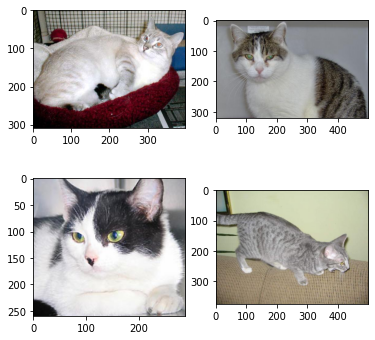

In [10]:
e = 0
plt.figure(figsize=(6, 6))

for i in os.listdir(cat_images):
    plt.subplot(2, 2, e+1)
    img = plt.imread(os.path.join(cat_images, i))
    plt.imshow(img)
    
    e += 1
    if e == 4:
        break


In [11]:
batch_size = 50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = 128
train_gen = ImageDataGenerator(rescale=1./255,
                             zoom_range=.15,
                             rotation_range=70,
                             height_shift_range=0.05,
                             width_shift_range=0.05,
                             )
gen_train_img = train_gen.flow_from_directory(petimages_folder,
                                          target_size=(img_size, img_size),
                                          class_mode="binary",
                                          batch_size=batch_size)

test_gen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.15,
                             rotation_range=70,
                             height_shift_range=0.05,
                             width_shift_range=0.05,
                             )

gen_test_img = test_gen.flow_from_directory(test_petimages_folder,
                                          target_size=(img_size, img_size),
                                          class_mode="binary",
                                          batch_size=batch_size)

Found 22998 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [12]:
gen_train_img.batch_size

50

In [13]:
gen_train_img.class_indices

{'cat': 0, 'dog': 1}

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(img_size, img_size, 3), activation="elu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), activation="elu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), activation="elu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, "sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0

In [15]:
model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])

In [16]:
acc_goal = .80

class CallBackClass(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        if logs["val_accuracy"] >= acc_goal:
            print("Validation Accuracy skipped", acc_goal, "so the model will stop training")
            self.model.stop_training = True

my_cb = CallBackClass()
epochs = 50

In [17]:
tot_num_of_training = len(os.listdir(cat_images)) + len(os.listdir(dog_images))
tot_num_of_testing = len(os.listdir(test_cat_images)) + len(os.listdir(test_dog_images))
history = model.fit(gen_train_img, epochs=epochs, validation_data=gen_test_img, callbacks=my_cb,
                    steps_per_epoch=tot_num_of_training//batch_size, validation_steps=tot_num_of_testing//batch_size)

Epoch 1/50
266/459 [================>.............] - ETA: 59s - loss: 0.7409 - accuracy: 0.5969 

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

459/459 [==============================] - 154s 335ms/step - loss: 0.6922 - accuracy: 0.6241 - val_loss: 0.7067 - val_accuracy: 0.5965
Epoch 2/50
459/459 [==============================] - 151s 329ms/step - loss: 0.5764 - accuracy: 0.6957 - val_loss: 0.5486 - val_accuracy: 0.7200
Epoch 3/50
459/459 [==============================] - 151s 328ms/step - loss: 0.5249 - accuracy: 0.7390 - val_loss: 0.5472 - val_accuracy: 0.7190
Epoch 4/50
459/459 [==============================] - 151s 328ms/step - loss: 0.4924 - accuracy: 0.7601 - val_loss: 0.5109 - val_accuracy: 0.7330
Epoch 5/50
459/459 [==============================] - 150s 328ms/step - loss: 0.4578 - accuracy: 0.7828 - val_loss: 0.8969 - val_accuracy: 0.6540
Epoch 6/50
459/459 [==============================] - 150s 327ms/step - loss: 0.4254 - accuracy: 0.8027 - val_loss: 0.4241 - val_accuracy: 0.7960
Epoch 7/50
459/459 [==============================] - 150s 327ms/step - loss: 0.4007 - accuracy: 0.8195 - val_loss: 1.0474 - val_accura

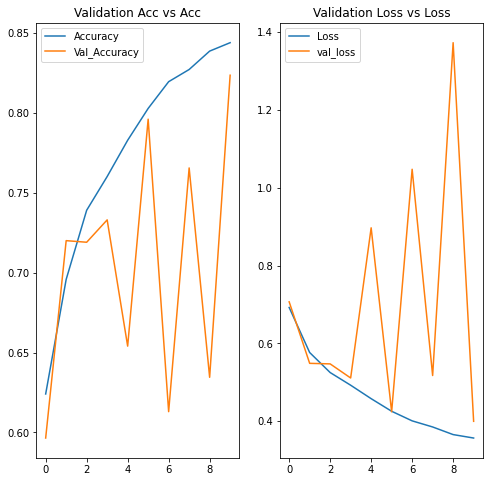

In [18]:
acc = history.history["accuracy"]
loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.title("Validation Acc vs Acc")
plt.plot(history.epoch, acc, label="Accuracy")
plt.plot(history.epoch, val_acc, label="Val_Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Validation Loss vs Loss")
plt.plot(history.epoch, loss, label="Loss")
plt.plot(history.epoch, val_loss, label="val_loss")
plt.legend()


In [19]:
model.save("DogsVsCats_model.h5")
